In [43]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

class utilities:
    @staticmethod
    def set_node_community(G, communities):
        for c, v_c in enumerate(communities):
            for v in v_c:
                G.nodes[v]['community'] = c + 1
    
    @staticmethod
    def set_edge_community(G):
        for v, w in G.edges:
            if G.nodes[v]['community'] == G.nodes[w]['community']:
                G.edges[v, w]['community'] = G.nodes[v]['community']
            else:
                G.edges[v, w]['community'] = 0
                
    @staticmethod
    def get_color(i, r_off = 1, g_off = 1, b_off = 1):
        r0, g0, b0 = 0, 0, 0
        n = 16
        low, high = 0.1, 0.9
        span = high - low
        r = low + span * (((i + r_off) * 3) % n) / (n - 1)
        g = low + span * (((i + g_off) * 5) % n) / (n - 1)
        b = low + span * (((i + b_off) * 7) % n) / (n - 1)
        return (r, g, b)
    
    @staticmethod
    def get_community_node_coloring(G):
        lst = [utilities.get_color(G.nodes[v]['community']) for v in G.nodes]
        return lst

    @staticmethod
    def get_internal_external_coloring(G):
        external = [(v, w) for v, w in G.edges 
                    if G.edges[v, w]['community'] == 0]
        internal = [(v, w) for v, w in G.edges 
                    if G.edges[v, w]['community'] > 0]
        internal_color = [get_color(G.edges[e]['community'])
                          for e in internal]
        return (external, internal, internal_color)            

def draw_community_graph(G, bridges = False):
    node_color = utilities.get_community_node_coloring(G)
    external, internal, internal_color = utilities.get_internal_external_coloring(G)
    positions = nx.spring_layout(G, seed = 42)
    plt.figure(1, figsize = (12, 12)) 
    if bridges:
        nx.draw_networkx(
            G, pos = positions,
            node_size = 0, 
            edgelist = external, 
            edge_color = "#333333")
    else:
        nx.draw_networkx(
            G, pos = positions,
            node_color = node_color,
            node_size = 0,
            edgelist = internal,
            edge_color = internal_color, alpha = 0.1, with_labels = False)

In [31]:
G_karate = nx.karate_club_graph()
communities = sorted(nx.algorithms.community.greedy_modularity_communities(G_karate), 
                     key = len,
                     reverse = True)

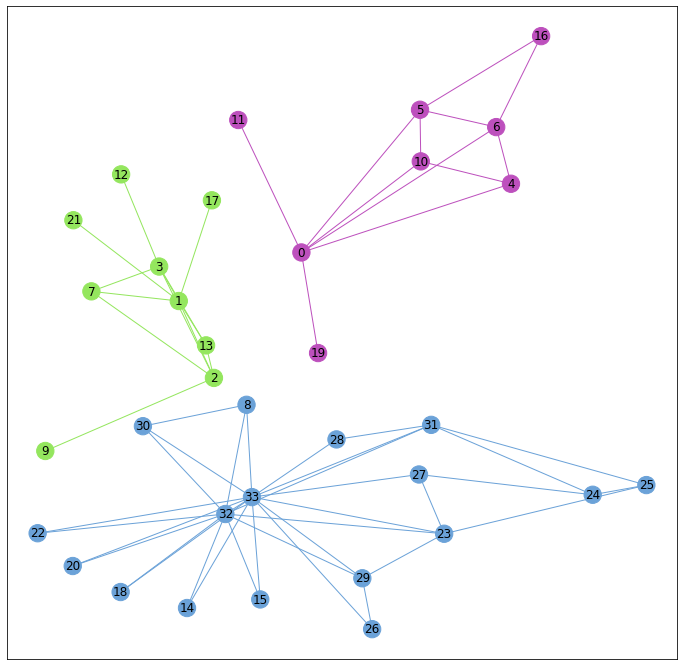

In [32]:
utilities.set_node_community(G_karate, communities)
utilities.set_edge_community(G_karate)
draw_community_graph(G_karate)

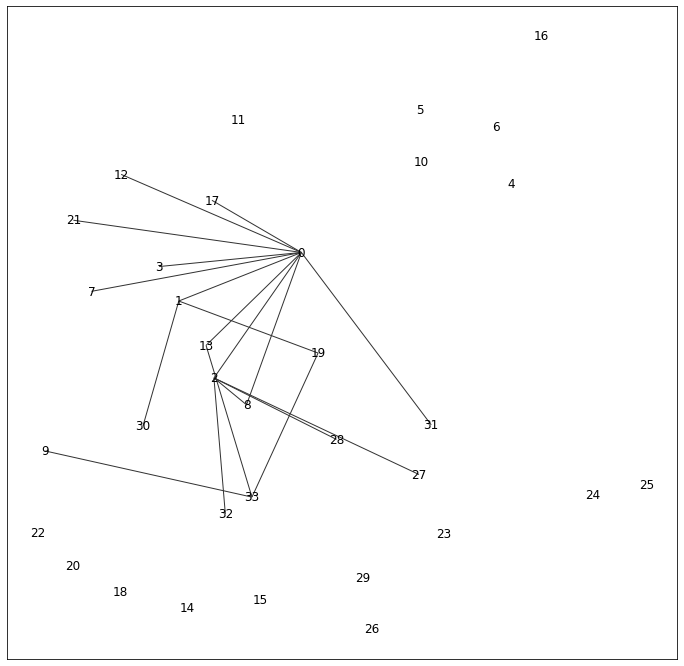

In [33]:
draw_community_graph(G_karate, bridges = True)

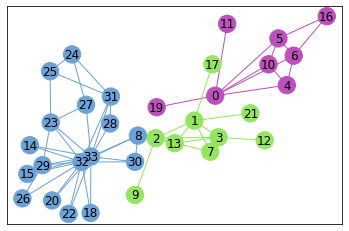

In [13]:
nx.draw_networkx(
    G_karate,
    pos = karate_pos,
    node_color = node_color,
    edgelist = internal,
    edge_color = internal_color
)

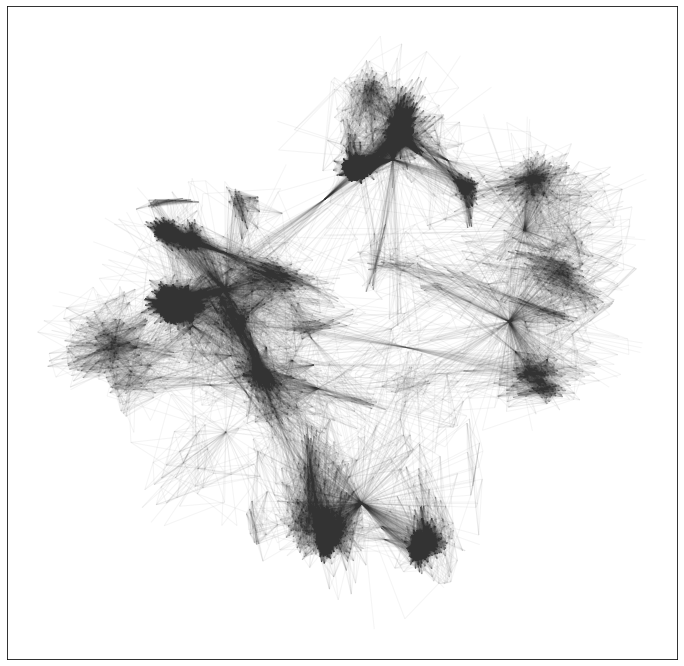

In [34]:
from pathlib import Path
G_social = nx.read_edgelist('facebook_combined.txt')
positions = nx.spring_layout(G_social, k = 0.1)
plt.figure(1, figsize = (12, 12))
nx.draw_networkx(G_social, pos = positions, node_size = 0, edge_color = "#333333", alpha = 0.05, with_labels = False)

In [35]:
communities = sorted(nx.algorithms.community.greedy_modularity_communities(G_social), 
                     key = len,
                     reverse = True)

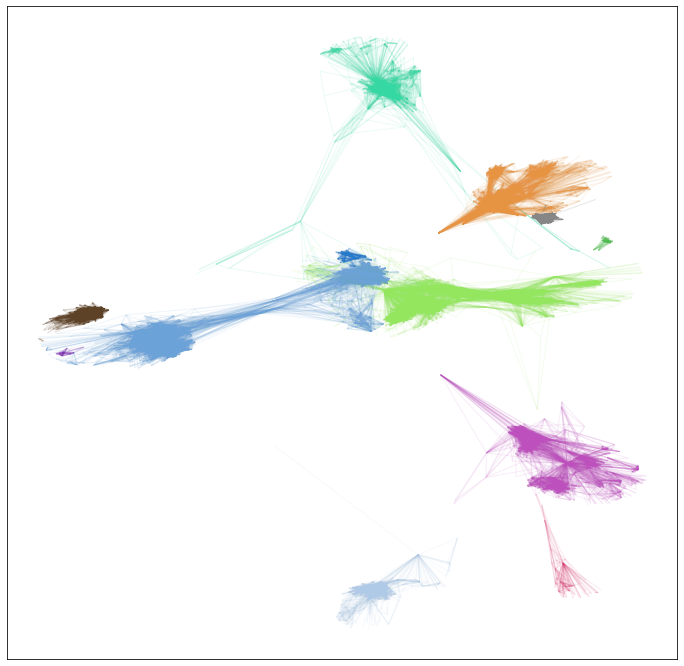

In [44]:
utilities.set_node_community(G_social, communities)
utilities.set_edge_community(G_social)
draw_community_graph(G_social)